In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.svm import SVC 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [193]:
df = pd.read_csv("googleplaystore.csv", encoding = 'unicode_escape', engine ='python')

In [194]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite äóñ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


# Data cleaning

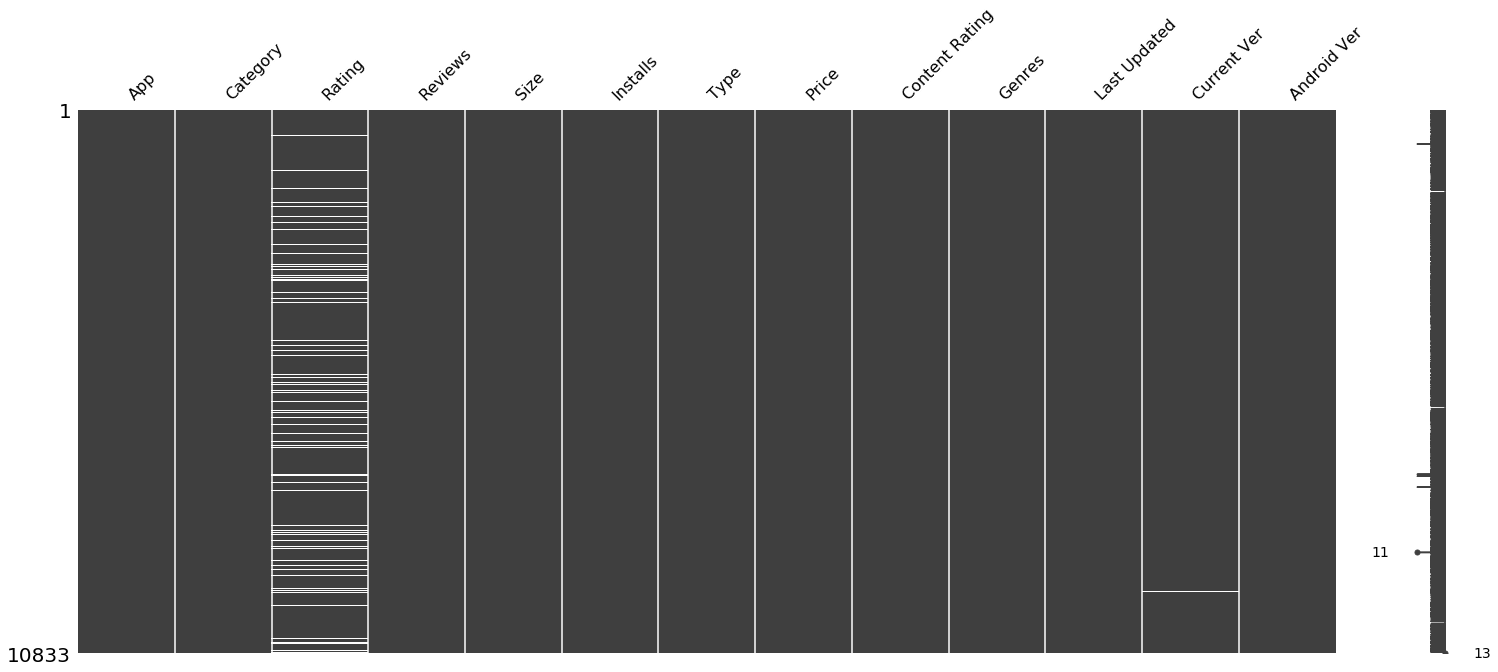

In [195]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(10833))

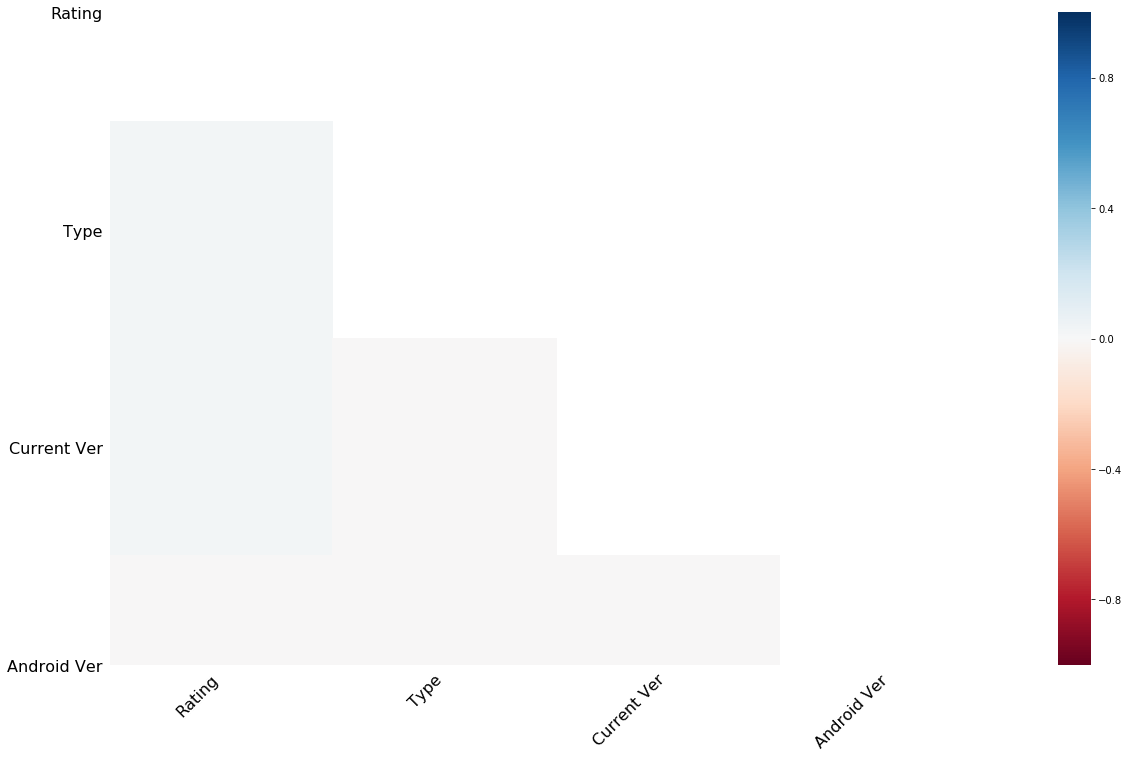

In [196]:
#msno.heatmap(df) 

In [159]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)


In [160]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [161]:
#converting last updated to month and year
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df['year_added']=df['Last Updated'].dt.year
df['month_added']=df['Last Updated'].dt.month

In [162]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [163]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [164]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)


In [165]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)


In [166]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)


In [167]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10839
Data columns (total 17 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null object
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int64
Genres            9360 non-null object
Last Updated      9360 non-null datetime64[ns]
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Category_c        9360 non-null int64
year_added        9360 non-null int64
month_added       9360 non-null int64
Genres_c          9360 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7), object(6)
memory usage: 1.3+ MB


In [168]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Rating,Reviews,Size,Type,Price,Content Rating,Category_c,year_added,month_added,Genres_c
Rating,1.000000,0.068133,0.083636,0.039592,-0.021919,0.000862,-0.026545,0.137871,0.017234,-0.028001
Reviews,0.068133,1.000000,0.150338,-0.043244,-0.009824,0.060929,-0.013501,0.078321,0.048959,-0.004487
Size,0.083636,0.150338,1.000000,-0.030966,-0.024773,0.159301,-0.040952,0.199363,0.050871,-0.095457
Type,0.039592,-0.043244,-0.030966,1.000000,0.223344,-0.034392,0.049092,-0.173394,-0.012523,0.061286
Price,-0.021919,-0.009824,-0.024773,0.223344,1.000000,-0.016139,-0.014875,-0.003406,-0.001881,-0.023543
Content Rating,0.000862,0.060929,0.159301,-0.034392,-0.016139,1.000000,-0.094025,0.068874,0.021446,-0.094876
Category_c,-0.026545,-0.013501,-0.040952,0.049092,-0.014875,-0.094025,1.000000,-0.061478,0.009893,0.844630
year_added,0.137871,0.078321,0.199363,-0.173394,-0.003406,0.068874,-0.061478,1.000000,-0.171858,-0.026697
month_added,0.017234,0.048959,0.050871,-0.012523,-0.001881,0.021446,0.009893,-0.171858,1.000000,0.011395
Genres_c,-0.028001,-0.004487,-0.095457,0.061286,-0.023543,-0.094876,0.844630,-0.026697,0.011395,1.000000


In [169]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

Missing Values plot after geeting of the nan values

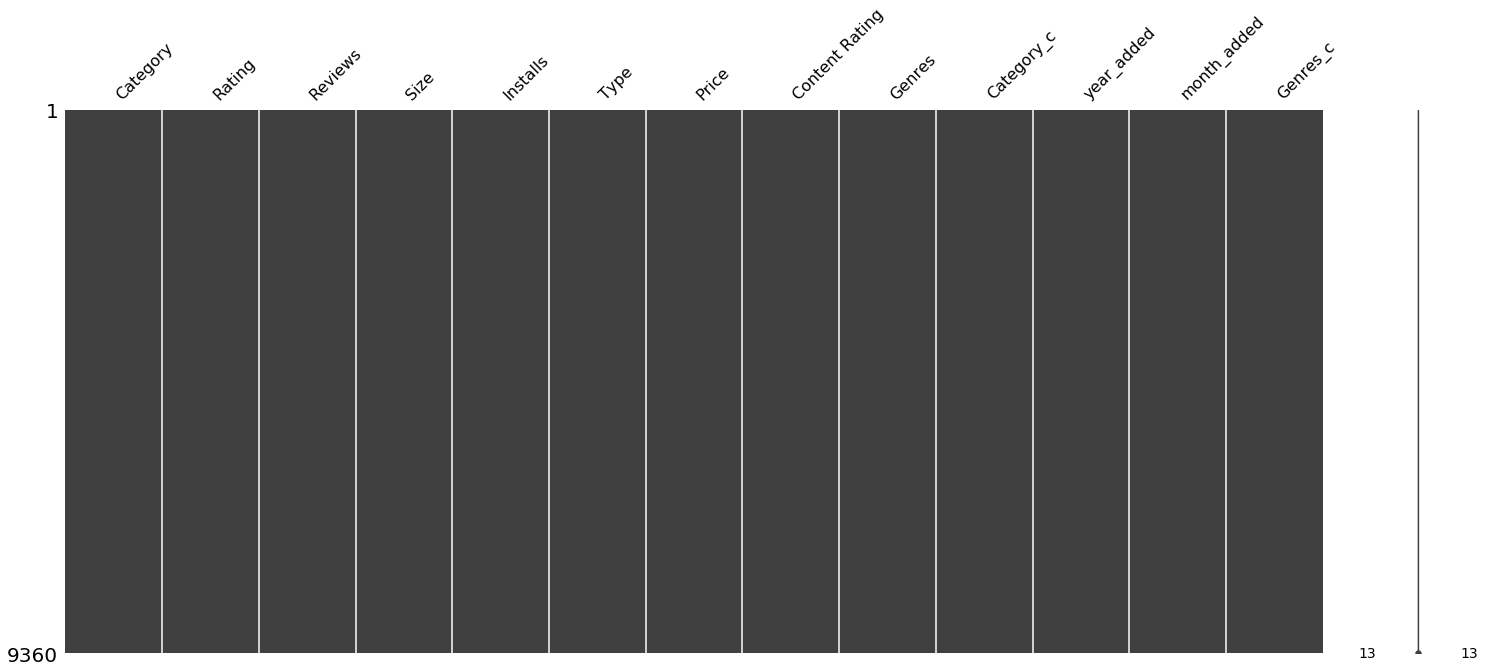

In [170]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(9360))

Distributed Graph

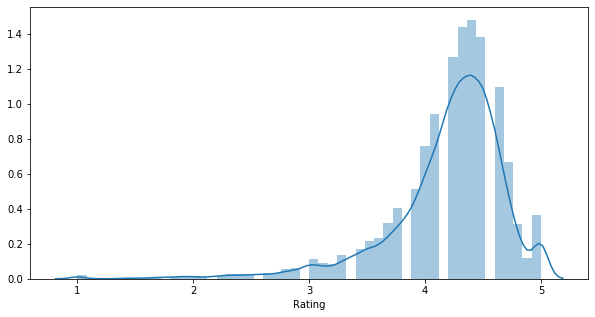

In [171]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(df['Rating'])

In [172]:
#df.head() #LOG 
helpful_log = np.log(df.Rating)
helpful_log.describe()
#df.head()

count    9360.000000
mean        1.423452
std         0.150190
min         0.000000
25%         1.386294
50%         1.458615
75%         1.504077
max         1.609438
Name: Rating, dtype: float64

In [173]:
# let's use 2 different regression models with two different techniques on treating the categorical variable
#creating dummy variables

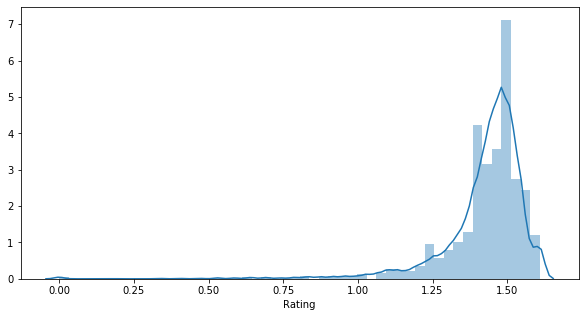

In [174]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(helpful_log)

In [175]:
catgry=pd.get_dummies(df['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(df['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(df['Content Rating'],prefix='cr',drop_first=True)
frames=[df,catgry,typ,cr]
df2=pd.concat(frames,axis=1)
df2.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)
df.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [176]:
df2.drop(['Size','Price','Genres'],axis=1,inplace=True)
df.drop(['Size','Price','Genres'],axis=1,inplace=True)

In [177]:
df2.head(15)

,Rating,Reviews,Category_c,year_added,month_added,Genres_c,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_1,cr_1,cr_2,cr_3,cr_4,cr_5
0,4.1,159,0,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,0,2018,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,0,2018,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,0,2018,6,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967,0,2018,6,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,0,2017,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.8,178,0,2018,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.1,36815,0,2018,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.4,13791,0,2017,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4.7,121,0,2018,7,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
#Feature selection
#Xstant=X-mean(X)/st.dev(X)
#Xnorm=X-min(X)/max(X)-min(X)¶

In [179]:
#Assigning the x and y values

X=df.drop('Rating',axis=1)
y=df['Rating'].values
y=y.astype('int')

X_d=df2.drop('Rating',axis=1)
y_d=df2['Rating'].values
y_d=y_d.astype('int')

In [180]:
#> Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data
X_d.head()

,Reviews,Category_c,year_added,month_added,Genres_c,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_1,cr_1,cr_2,cr_3,cr_4,cr_5
0,159,0,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,0,2018,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,0,2018,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,0,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,967,0,2018,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size = 0.2, random_state=0)

In [182]:
#Standard Scaler is used

In [183]:
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

sc_X_d=StandardScaler()
X_train_d=sc_X_d.fit_transform(X_train_d)
X_test_d=sc_X_d.transform(X_test_d)

In [189]:
rdf_c = RandomForestRegressor(n_estimators=10,random_state=0)
rdf_c.fit(X_train,y_train)


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [197]:
#RandomForest
rdf_c = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred = rdf_c.predict(X_test)
rdf_cm = confusion_matrix(y_test,rdf_pred)
rdf_ac = accuracy_score(rdf_pred,y_test)
rdf_mse = mean_squared_error(rdf_pred,y_test)
rdf_r2 = r2_score(rdf_pred, y_test)

rdf_c_d = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c_d.fit(X_train_d,y_train_d)
rdf_pred_d = rdf_c_d.predict(X_test_d)
rdf_cm_d = confusion_matrix(y_test_d,rdf_pred_d)
rdf_ac_d = accuracy_score(rdf_pred_d,y_test_d)
rdf_mse_d = mean_squared_error(rdf_pred_d,y_test_d)
rdf_r2_d = r2_score(rdf_pred_d, y_test_d)

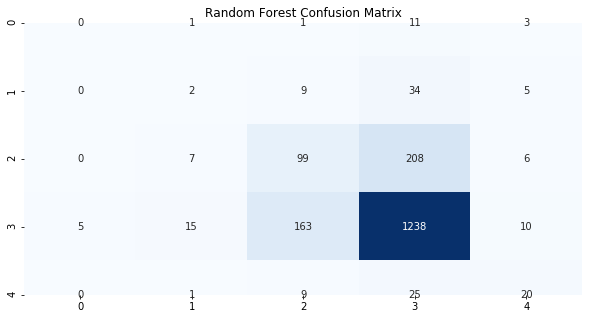

In [198]:
plt.figure(figsize=(10,5))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)


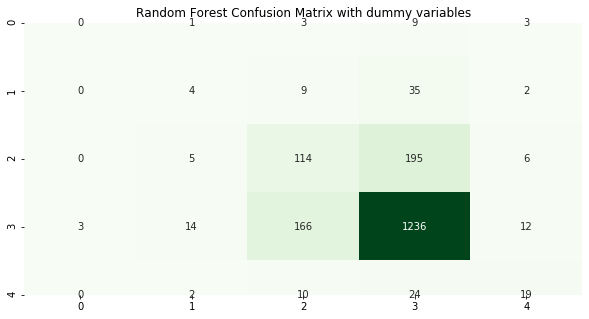

In [199]:
plt.figure(figsize=(10,5))
plt.title("Random Forest Confusion Matrix with dummy variables")
sns.heatmap(rdf_cm_d,annot=True,cmap="Greens",fmt="d",cbar=False)


In [200]:
cm1 = confusion_matrix(y_test,rdf_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[   0    1    1   11    3]
 [   0    2    9   34    5]
 [   0    7   99  208    6]
 [   5   15  163 1238   10]
 [   0    1    9   25   20]]
Accuracy :  0.0010683760683760685
Sensitivity :  0.0
Specificity :  1.0


In [208]:
print('RandomForest_accuracy:',rdf_ac)
print('RandomForest_mse:',rdf_mse)

print('RandomForest_accuracy including dummy variables:',rdf_ac_d)
print('RandomForest_mse with dummies:',rdf_mse_d)


RandomForest_accuracy: 0.7259615384615384
RandomForest_mse: 0.4962606837606838
RandomForest_accuracy including dummy variables: 0.7334401709401709
RandomForest_mse with dummies: 0.46794871794871795


In [203]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

NameError: name 'Results' is not defined

<Figure size 864x504 with 0 Axes>

In [204]:
#LogisticRegression
lr_c = LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred = lr_c.predict(X_test)
lr_cm = confusion_matrix(y_test,lr_pred)
lr_ac = accuracy_score(y_test, lr_pred)
lr_mse = mean_squared_error(rdf_pred,y_test)
lr_r2 = r2_score(rdf_pred, y_test)

/Users/mansiudani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mansiudani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


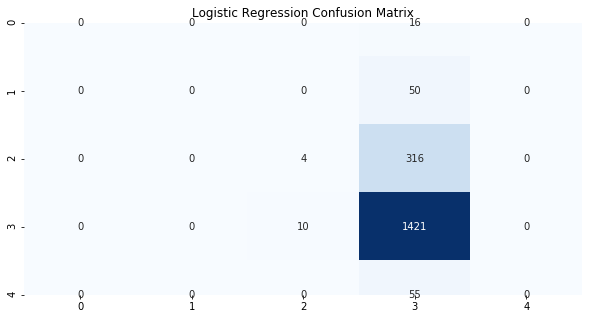

In [86]:
plt.figure(figsize=(10,5))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [206]:
print('LogisticRegression Accuracy:',lr_ac)
print('RandomForest_accuracy:',rdf_ac)
print('Mean Square Error for Google:',lr_mse)
print('R2:',lr_r2)

Mean Square Error for Google: 0.4962606837606838


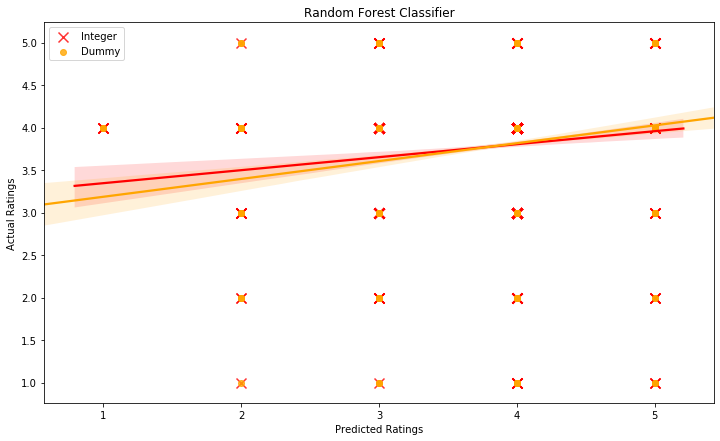

In [143]:
plt.figure(figsize=(12,7))
sns.regplot(rdf_pred,y_test, label = 'Integer', marker='x',color='red', scatter_kws={'s':100})
sns.regplot(rdf_pred_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Random Forest Classifier')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)